<a href="https://colab.research.google.com/github/Anchayadav/AutoTS/blob/main/Amazone_Alexa_Review_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import nltk
nltk.download('vader_lexicon')
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiment = SentimentIntensityAnalyzer()

data=pd.read_csv("amazon_alexa.tsv",delimiter='\t')
print(data.head())

   rating       date         variation  \
0       5  31-Jul-18  Charcoal Fabric    
1       5  31-Jul-18  Charcoal Fabric    
2       4  31-Jul-18    Walnut Finish    
3       5  31-Jul-18  Charcoal Fabric    
4       5  31-Jul-18  Charcoal Fabric    

                                    verified_reviews  feedback  
0                                      Love my Echo!         1  
1                                          Loved it!         1  
2  Sometimes while playing a game, you can answer...         1  
3  I have had a lot of fun with this thing. My 4 ...         1  
4                                              Music         1  


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
print(data.describe())
print(data.isnull().sum())
print(data.columns)

            rating     feedback
count  3150.000000  3150.000000
mean      4.463175     0.918413
std       1.068506     0.273778
min       1.000000     0.000000
25%       4.000000     1.000000
50%       5.000000     1.000000
75%       5.000000     1.000000
max       5.000000     1.000000
rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64
Index(['rating', 'date', 'variation', 'verified_reviews', 'feedback'], dtype='object')


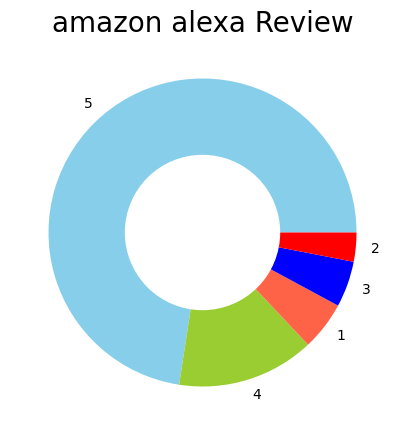

In [ ]:
ratings=data['rating'].value_counts()
number = ratings.index
quantity= ratings.values


custom_colors = ['skyblue','yellowgreen','tomato','blue','red']
plt.figure(figsize=(5,5))
plt.pie(quantity,labels=number,colors=custom_colors)
central_circle =plt.Circle((0,0),0.5,color='white')
fig=plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font',size=12)
plt.title('amazon alexa Review',fontsize=20)
plt.show()

In [ ]:
sentiment = SentimentIntensityAnalyzer()
data['Positive']=[sentiment.polarity_scores(i)['pos']for i in data['verified_reviews']]
data['Negative']=[sentiment.polarity_scores(i)['neg']for i in data['verified_reviews']]
data['Neutral']=[sentiment.polarity_scores(i)['neu']for i in data['verified_reviews']]

print(data.head())

   rating       date         variation  \
0       5  31-Jul-18  Charcoal Fabric    
1       5  31-Jul-18  Charcoal Fabric    
2       4  31-Jul-18    Walnut Finish    
3       5  31-Jul-18  Charcoal Fabric    
4       5  31-Jul-18  Charcoal Fabric    

                                    verified_reviews  feedback  Positive  \
0                                      Love my Echo!         1     0.692   
1                                          Loved it!         1     0.807   
2  Sometimes while playing a game, you can answer...         1     0.114   
3  I have had a lot of fun with this thing. My 4 ...         1     0.383   
4                                              Music         1     0.000   

   Negative  Neutral  
0     0.000    0.308  
1     0.000    0.193  
2     0.102    0.784  
3     0.000    0.617  
4     0.000    1.000  


In [ ]:
x=sum(data['Positive'])
y=sum(data['Negative'])
z=sum(data['Neutral'])

def sentiment_score(x,y,z):
  if (x>y) and (x>z):
    print("positive")
  elif (y>x) and (y>z):
    print("Negative")
  else:
      print("Neutral")

sentiment_score(x,y,z)

Neutral


In [ ]:
print("positive:",x)
print("negative:",y)
print("Neutral:",z)

positive: 1035.4579999999983
negative: 96.79999999999995
Neutral: 1936.740999999996
